In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
#Loading the CSV Files
train = pd.read_csv('C:/Users/admin/Desktop/neha project/Assignment-neha/train_agriculture.csv')
test = pd.read_csv('C:/Users/admin/Desktop/neha project/Assignment-neha/test_agriculture.csv')

In [3]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
train.shape

(4599, 10)

In [5]:
train['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

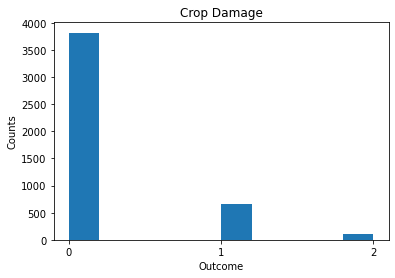

In [6]:
fig, ax = plt.subplots()
# plot histogram
ax.hist(train['Crop_Damage'])
# set title and labels
ax.set_xticks((0,1,2))
ax.set_title('Crop Damage')
ax.set_xlabel('Outcome')
ax.set_ylabel('Counts')
plt.show()

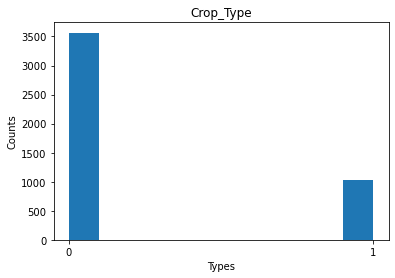

In [7]:
ig, ax = plt.subplots()
# plot histogram
ax.hist(train['Crop_Type'])
# set title and labels
ax.set_xticks((0,1))
ax.set_title('Crop_Type')
ax.set_xlabel('Types')
ax.set_ylabel('Counts')
plt.show()

> **Data Preprocessing**

now we will first handle the null values

In [8]:
train['Number_Weeks_Used'].unique()        # unique function is used to find the unique values 

array([ 0., nan, 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29.,
       22., 21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38.,
       42., 40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49.,
       53., 48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63.,
       66., 59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65.])

In [9]:
train.isnull().sum()                    #  isnull() function is used to find the null values,   sum() is used here to summ the total null values in a perticular column

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [10]:
train.drop(['ID'],axis=1,inplace=True)                  # drop function is used here to drop a perticular column

****fillna****

it is used to fill the missing values 

1. ffill = forward fill

In [11]:
train["Number_Weeks_Used"].fillna(method ='ffill', inplace = True)  

Now read the Test file

In [12]:
df1=pd.read_csv("C:/Users/admin/Desktop/neha project/Assignment-neha/test_agriculture.csv")

In [13]:
df1['Number_Weeks_Used'].unique()

array([nan,  0., 20., 19., 10., 14., 22., 13., 26., 17., 15., 25., 18.,
       29., 23., 27., 34., 16., 35., 28., 21., 12., 31., 33., 24., 36.,
       38., 30., 32.,  6., 41.,  7., 37., 40., 39., 45., 47., 42., 43.,
       44., 50., 52., 48., 46., 49., 56., 57., 54., 51., 53., 58., 59.,
       64., 62.,  5.,  9., 55.,  8., 11.])

Handling Null values

In [14]:
df1.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [15]:
df1.drop(['ID'],axis=1,inplace=True)

bfill= Backward fill

In [16]:
df1["Number_Weeks_Used"].fillna(method ='bfill', inplace = True)

In [17]:
df1.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,0.0,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1


Now we define X and y for train our model

In [18]:
X=train.drop(['Crop_Damage'],axis=1)

In [19]:
X.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [20]:
y=train.Crop_Damage

We use train_test_split from sklearn to split our dataset in to train set and test set.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=150)

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

import Logistic Regression from sklearn

In [22]:
from sklearn.linear_model import LogisticRegression

Fit and transform our data in between 0 to 1 by using MInMaxScalar

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

train the model by using fit method

to get the accuracy use score function

In [24]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8260869565217391

predict the values of test dataset using predict function

We develop the good crop damage model by using Logistic Regression model, to know about the hyperparameters of Logistioc Regressiion learn from the google, if you find ant difficulty, please let me know